# Behavioral Analysis

This notebook analyze the behavioral performance of individual sessions.

In [1]:
%config Completer.use_jedi = False

In [15]:
# from pathlib import Path
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from convnwb.io import load_nwbfile
from convnwb.io import get_files, save_json


from spiketools.plts.utils import make_axes, save_figure
from spiketools.plts.data import plot_bar
from spiketools.utils import set_random_seed
from spiketools.utils.base import count_elements

In [3]:
import sys
sys.path.append('../code')
from utils import (normalize_data, compute_distance_error, 
                   compute_recall_percent, get_confidence_response)
from plts import plot_distance_error, plot_recall_correctness, plot_confidence_response

In [4]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [5]:
# Define the base data folder
data_folder = '/Users/Claire_han/Documents/Data/JacobsLab/TH/NWB'

## Load data

In [6]:
# Get the list of NWB files
nwbfiles = get_files(data_folder)

In [7]:
# Get the list of NWB files running THO, THF respectively
nwbfiles_THF = get_files(data_folder, select='THF')
nwbfiles_THO = get_files(data_folder, select='THO')

## Distance error

In [8]:
# Compute the normalized distance error for all data, and for each task
norm_error = compute_distance_error(nwbfiles,data_folder)
norm_error_THF = compute_distance_error(nwbfiles_THF,data_folder)
norm_error_THO = compute_distance_error(nwbfiles_THO,data_folder)

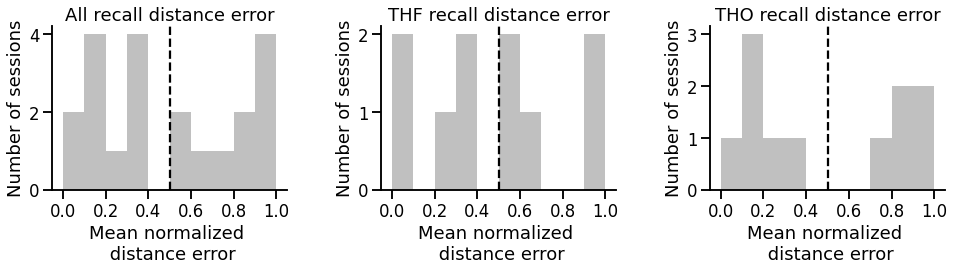

In [9]:
# Plot the normalized distance error for all data, and for each task
plot_distance_error(norm_error, norm_error_THF, norm_error_THO)

## Recall correctness

In [10]:
# Compute the percentage of recall for all data, and for each task
correct_all = compute_recall_percent(nwbfiles, data_folder)
correct_THF = compute_recall_percent(nwbfiles_THF, data_folder)
correct_THO = compute_recall_percent(nwbfiles_THO, data_folder)

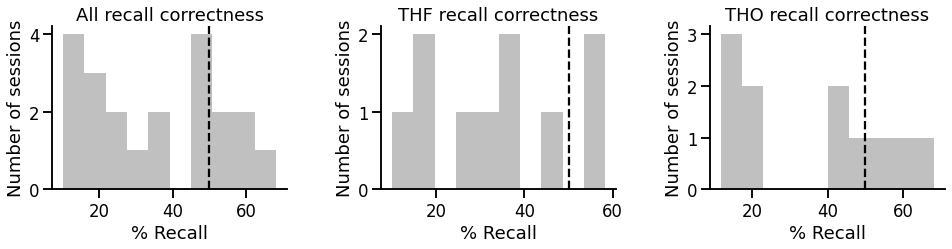

In [11]:
# Plot the percentage of recall for all data, and for each task
plot_recall_correctness(correct_all, correct_THF, correct_THO)

## Confidence response

In [12]:
# Count the number of confidence response in each category across sessions
[conf_all, conf_THF, conf_THO] = Counter({'yes': 0, 'maybe':0, 'no':0})
labels = ['yes', 'maybe', 'no']

conf_all = get_confidence_response(nwbfiles, data_folder, labels)
conf_THF = get_confidence_response(nwbfiles_THF, data_folder, labels)
conf_THO = get_confidence_response(nwbfiles_THO, data_folder, labels)

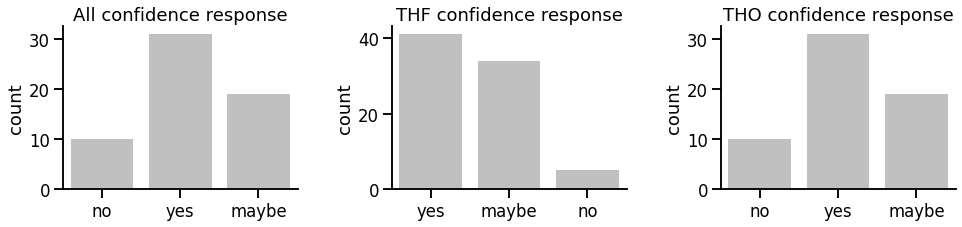

In [13]:
# Plot the number of confidence response in each category 
plot_confidence_response(conf_all, conf_THF, conf_THO)

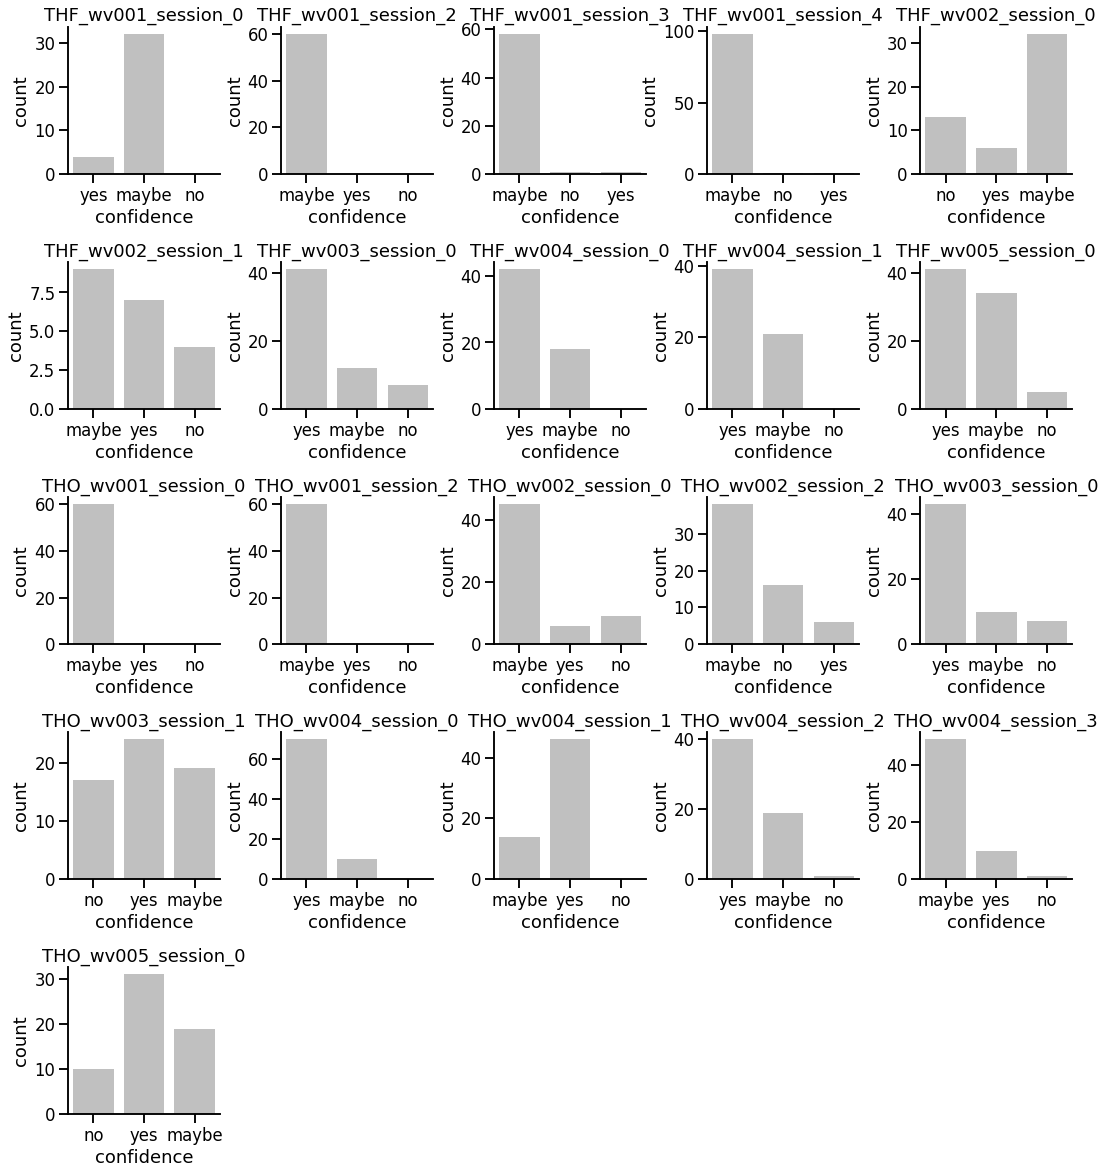

In [16]:
# Plot the confidence response for each session
conf_all = Counter({'yes': 0, 'maybe':0, 'no':0})
for nwbfile, ax in zip(nwbfiles, make_axes(len(nwbfiles), wspace=0.4, hspace=0.6)):
    nwbfile, io = load_nwbfile(nwbfile, data_folder, return_io=True)
    name = nwbfile.session_id
    conf_counts = count_elements(nwbfile.trials.confidence_response.data[:],
                                 labels=['yes', 'maybe', 'no'])
    
    plot_bar(conf_counts.values(), labels=conf_counts.keys(), title='{}'.format(name),
             xlabel='confidence', ylabel='count', ax=ax, color='silver')
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

## Successful vs. Unsuccessful recall
To-Dos:
* add behavioral analysis for successful vs. unsuccessful recall